In [136]:
%matplotlib inline
import ggplot
from ggplot import *
import numpy as np
import pandas as pd
from collections import Counter
from sets import Set

In [137]:
seattle = pd.read_csv("seattle_incidents_summer_2014.csv",dtype=str)
sanFrans = pd.read_csv("sanfrancisco_incidents_summer_2014.csv",dtype=str)

In [178]:
def time_vs_incident(df,city,topk=3):
    df["time"] = pd.to_datetime(df["Occurred Date or Date Range Start"],format='%m/%d/%Y %I:%M:%S %p')
    df["hour"] = df["time"].map(lambda x : int(x.hour) )
    grouped = df.groupby(["hour"])
    hour = []
    count = []
    type_name = []
    for name,group in grouped:
        type_count = Counter()
        for subname,subgroup in group.groupby(["Offense Type"]):
            type_count[subname] = subgroup.shape[0]
        most_common = type_count.most_common(topk)
        for elem in most_common:
            hour.append(name)
            count.append(elem[1])
            type_name.append(elem[0])
    df2 = pd.DataFrame({"hour":hour,"count":count,"type_name":type_name})
    plot = ggplot(aes(x='hour', y='count', colour='type_name'), data=df2) +geom_point()+xlab("hour") + ylab("count") + ggtitle("Offense Type vs Time in "+city)
    print plot
    ggsave(plot,time_vs_incident.__name__+ " "+ city + ".eps")
    #
    hour = []
    count = []
    type_name = []
    grouped = df.groupby(["hour","Offense Type"])
    for name,group in grouped:
        hour.append(name[0])
        type_name.append(name[1])
        count.append(group.shape[0])
    df3= pd.DataFrame({"hour":hour,"count":count,"type_name":type_name})
    df3["type_name"] = df3["type_name"].str.lower()
    robberies = df3[df3["type_name"].str.contains("robbery")]
    hour = []
    count = []
    for name,group in robberies.groupby(["hour"]):
        hour.append(name)
        count.append(group["count"].sum())
    df4 = pd.DataFrame({"hour":hour,"count":count})
    plot = ggplot(aes(x='hour', y='count'), data=df4) +geom_point()+geom_line()+xlab("hour") + ylab("count") + ggtitle("Count of Robberies vs Time in "+city)
    print plot

##Incidents vs Time in Seattle##
First Let's examine how incidents vary against time. To make this simple, for each hour, I only chose top 3 most common crime types to make the plot less crowded. As can be seen, **theft-carprowl** are most prevalent among all the crimes. 

In the evening, most common crimes are still **theft-carprowl**.

With regards to how robberies varies against time, the most common time is 12pm and 23pm.

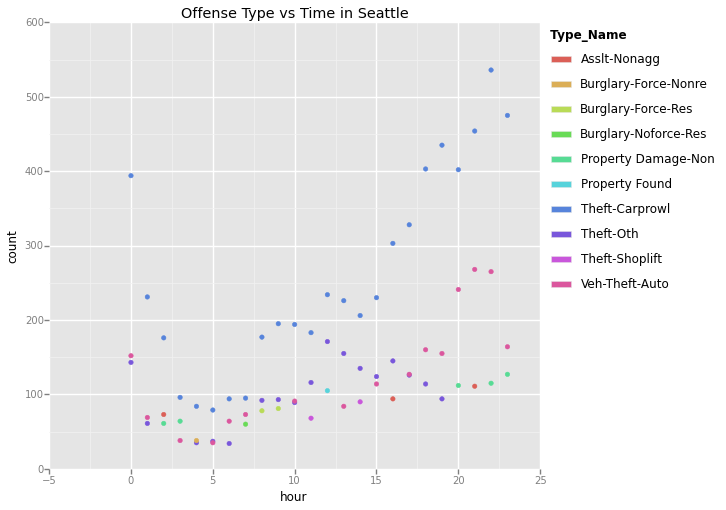

<ggplot: (288470425)>


Saving 11.0 x 8.0 in image.


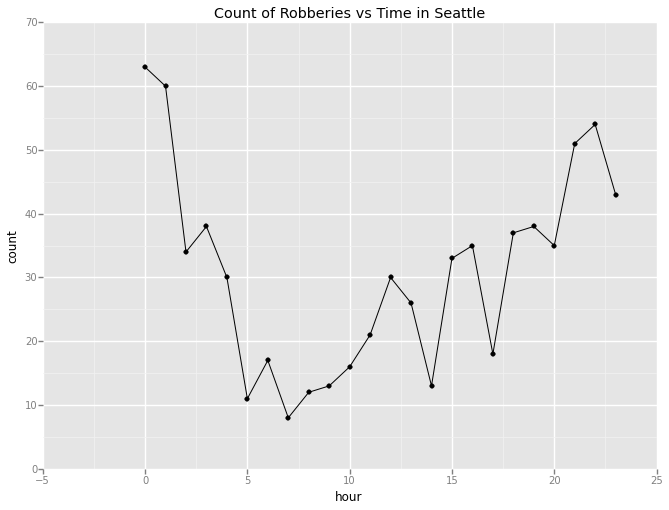

<ggplot: (287454945)>


In [179]:
time_vs_incident(seattle,"Seattle")

##Incidents vs Time in SanFrancisco##
First Let's examine how incidents vary against time. To make this simple, for each hour, I only chose top 3 most common crime types to make the plot less crowded. As can be seen, **Larceny/Theft** are most prevalent among all the crimes. 

In the evening, most common crimes are still **Larceny/Theft**.

With regards to how robberies varies against time, surprisingly the most common time is 12pm and around midnight.

In [180]:
def time_vs_incident_2(df,city,topk=3):
    df["hour"] = pd.to_datetime(df["Time"],format='%H:%M')
    df["hour"] = df["hour"].map(lambda x: int(x.hour))
    grouped = df.groupby(["hour"])
    hour = []
    count = []
    type_name = []
    for name,group in grouped:
        type_count = Counter()
        for subname,subgroup in group.groupby(["Category"]):
            type_count[subname] = subgroup.shape[0]
        most_common = type_count.most_common(topk)
        for elem in most_common:
            hour.append(name)
            count.append(elem[1])
            type_name.append(elem[0])
    df2 = pd.DataFrame({"hour":hour,"count":count,"type_name":type_name})
    plot = ggplot(aes(x='hour', y='count', colour='type_name'), data=df2) +geom_point()+xlab("hour") + ylab("count") + ggtitle("Offense Type vs Time in "+city)
    print plot
    ggsave(plot,time_vs_incident.__name__+ " "+ city + ".eps")
    #
    hour = []
    count = []
    type_name = []
    grouped = df.groupby(["hour","Category"])
    for name,group in grouped:
        hour.append(name[0])
        type_name.append(name[1])
        count.append(group.shape[0])
    df3= pd.DataFrame({"hour":hour,"count":count,"type_name":type_name})
    df3["type_name"] = df3["type_name"].str.lower()
    robberies = df3[df3["type_name"].str.contains("robbery")]
    hour = []
    count = []
    for name,group in robberies.groupby(["hour"]):
        hour.append(name)
        count.append(group["count"].sum())
    df4 = pd.DataFrame({"hour":hour,"count":count})
    plot = ggplot(aes(x='hour', y='count'), data=df4) +geom_point()+geom_line()+xlab("hour") + ylab("count") + ggtitle("Count of Robberies vs Time in "+city)
    print plot

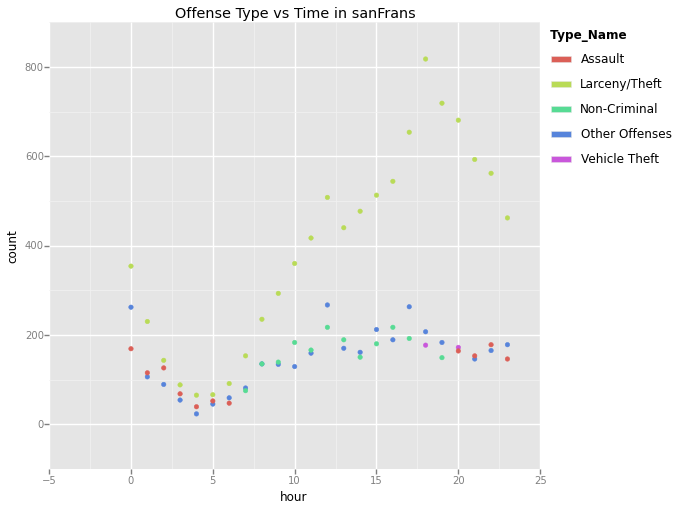

<ggplot: (290644913)>


Saving 11.0 x 8.0 in image.


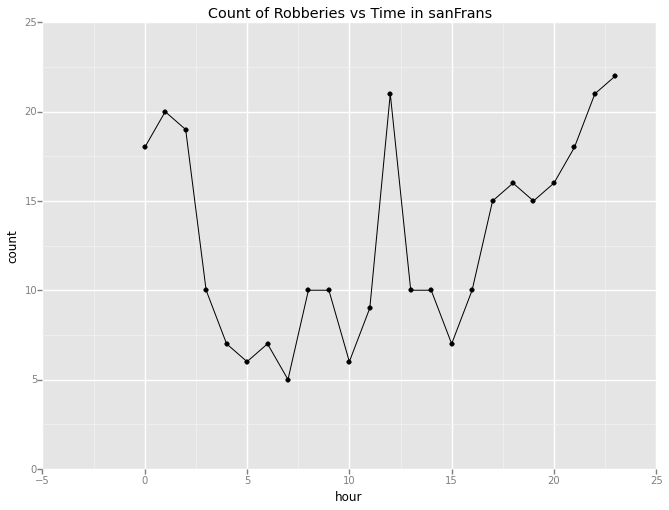

<ggplot: (291475885)>


In [181]:
time_vs_incident_2(sanFrans,"sanFrans")